In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np

In [3]:
df = read_csv("../../datasets/AFG_GDP.csv")
df.head()

,Country,Year,GDP,LifeExpectancy
0,Afghanistan,2000,285.0,56.2
1,Afghanistan,2001,292.0,56.8
2,Afghanistan,2002,300.0,57.2
3,Afghanistan,2003,310.0,57.6
4,Afghanistan,2004,321.0,58.1


In [4]:
cdf = df[['Year', 'GDP']]
cdf.head()

,Year,GDP
0,2000,285.0
1,2001,292.0
2,2002,300.0
3,2003,310.0
4,2004,321.0


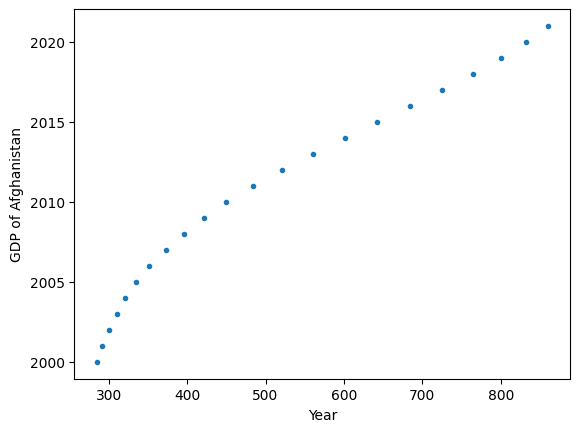

In [5]:
# plt.xticks(range(0, 1000, 100))
plt.xlabel('Year')
           
# plt.yticks(range(2000, 2021, 1))
plt.ylabel('GDP of Afghanistan')
           
plt.plot(cdf['GDP'].values, cdf['Year'].values, '.')
plt.show()

plt.show()

In [6]:
msk = np.random.rand(len(cdf)) < 0.8
train_data = cdf[msk]
test_data = cdf[~msk]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train_data['Year']).reshape(-1,1)
train_y = np.asanyarray(train_data['GDP'])

test_y = np.asanyarray(train_data['Year'])
test_x = np.asanyarray(train_data['GDP'])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 2.00000000e+03, 4.00000000e+06, 8.00000000e+09],
       [1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [1.00000000e+00, 2.00300000e+03, 4.01200900e+06, 8.03605403e+09],
       [1.00000000e+00, 2.00400000e+03, 4.01601600e+06, 8.04809606e+09],
       [1.00000000e+00, 2.00500000e+03, 4.02002500e+06, 8.06015012e+09],
       [1.00000000e+00, 2.00700000e+03, 4.02804900e+06, 8.08429434e+09],
       [1.00000000e+00, 2.00800000e+03, 4.03206400e+06, 8.09638451e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [1.00000000e+00, 2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [1.00000000e+00, 2.01300000e+03, 4.05216900e+06, 8.15701620e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e

In [8]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print (clf.coef_)
print (clf.intercept_)

[ 0.00000000e+00 -6.67568402e+05  3.31079484e+02 -5.47295702e-02]
448655725.70285314


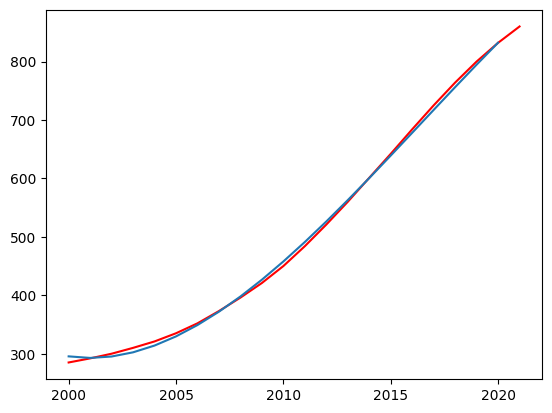

In [9]:
# XX = np.arange(2000, 2020)
# yy = clf.intercept_ + clf.coef_[1] + clf.coef_[2]*XX + clf.coef_[3]*np.power(XX, 2)

XX = np.arange(min(cdf['Year']), max(cdf['Year'])).reshape(-1, 1)
yy = clf.predict(poly.transform(XX))

plt.plot(cdf.Year, cdf.GDP, color="red")
plt.plot(XX, yy)
# plt.yticks(range(300, 1000))
plt.show()